In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input,decode_predictions
from keras.layers import *
from keras.utils.np_utils import to_categorical

In [50]:
train=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=45,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2,
)

In [51]:
train_gen=train.flow_from_directory(
    "data/",
    target_size=(250,250),
    class_mode="categorical",
    batch_size=64,
    subset="training"
)

validation_gen=train.flow_from_directory(
    "data/",
    target_size=(250,250),
    class_mode="categorical",
    batch_size=64,
    subset="validation"
)

Found 1004 images belonging to 3 classes.
Found 249 images belonging to 3 classes.


In [52]:
train_gen.labels

array([0, 0, 0, ..., 2, 2, 2])

In [54]:

model=Sequential()
model.add(MobileNetV2(include_top=False,input_shape=(250,250,3),weights='imagenet'))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(3,activation="softmax"))

model.layers[0].trainable=False

model.summary()


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_6 ( (None, 1280)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               327936    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 3)                

In [55]:
from keras.optimizers import Adam

In [56]:
adam=Adam(lr=0.001)

In [58]:
model.compile(optimizer=adam,loss="categorical_crossentropy",metrics=["accuracy"])

In [59]:
from keras.preprocessing import image

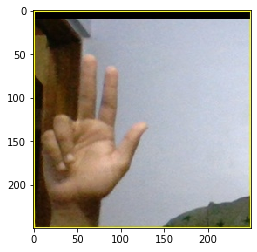

In [42]:
img=image.load_img("./data/scissors/scissors1.jpg")


plt.imshow(img)

In [60]:
h=model.fit_generator(train_gen,
                        epochs=5,
                        validation_data=validation_gen,
                        steps_per_epoch=16,
                        validation_steps=5,
                       )

Epoch 1/5
16/16 [==============================] - 352s 22s/step - loss: 0.7709 - accuracy: 0.6624 - val_loss: 1.4220 - val_accuracy: 0.3610
Epoch 2/5
16/16 [==============================] - 351s 22s/step - loss: 0.3002 - accuracy: 0.8894 - val_loss: 1.3463 - val_accuracy: 0.6006
Epoch 3/5
16/16 [==============================] - 358s 22s/step - loss: 0.1891 - accuracy: 0.9333 - val_loss: 1.0073 - val_accuracy: 0.5655
Epoch 4/5
16/16 [==============================] - 457s 29s/step - loss: 0.1226 - accuracy: 0.9532 - val_loss: 0.8914 - val_accuracy: 0.5980
Epoch 5/5
16/16 [==============================] - 362s 23s/step - loss: 0.0981 - accuracy: 0.9641 - val_loss: 1.3924 - val_accuracy: 0.5942


In [ ]:
model_new.save("stone_paper_scissors.h5")

In [59]:
train_gen.class_indices

{'paper': 0, 'scissors': 1, 'stone': 2}

In [60]:
import cv2

In [61]:
def process_input(frame):
    img=cv2.resize(np.array(frame),(200,200))
    img=preprocess_input(img)
    return img

In [62]:
img=process_input(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


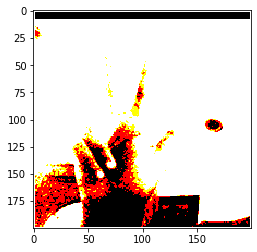

In [40]:
plt.imshow(img)

In [19]:
249/16

15.5625